In [1]:
%matplotlib inline
import pandas as pd

In [2]:
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [3]:
titles = pd.DataFrame.from_csv('data/titles.csv', index_col=None)
titles.head()

,title,year
0,The Beachcomber,1954
1,You Were Never Here,2017
2,Hei shou jin gang,1974
3,Campioana,1990
4,Doroppu,2009


In [5]:
cast = pd.DataFrame.from_csv('data/cast.csv', index_col=None)
cast.head()

,title,year,name,type,character,n
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,31.0
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN


### What are the ten most common movie names of all time?

In [8]:
titles.title.value_counts().head(10)

Hamlet                  20
Carmen                  16
Macbeth                 14
Maya                    12
The Outsider            12
Kismet                  11
Othello                 11
Temptation              11
The Three Musketeers    11
She                     10
Name: title, dtype: int64

### Which three years of the 1930s saw the most films released?

In [10]:
titles[titles.year // 10 == 193].year.value_counts().head(3)

1937    1200
1936    1138
1938    1135
Name: year, dtype: int64

### Plot the number of films that have been released each decade over the history of cinema.

In [12]:
titles[titles.year // 10 == 198].year.value_counts()

1988    2332
1989    2259
1987    2244
1986    2083
1985    1990
1983    1967
1982    1951
1984    1944
1981    1905
1980    1815
Name: year, dtype: int64

In [13]:
len(titles[titles.year // 10 == 198])

20490

In [21]:
years = (titles.year // 10 * 10)



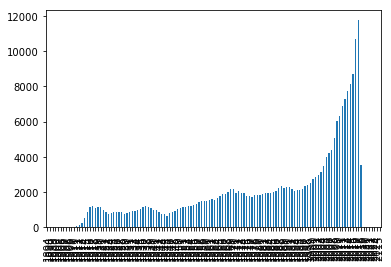

In [34]:
titles.year.value_counts().sort_index().plot(kind='bar')

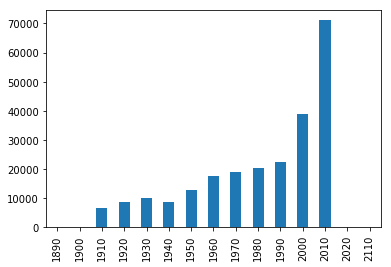

In [28]:
(titles.year // 10 *10 ).value_counts().sort_index().plot(kind='bar')

### Plot the number of "Hamlet" films made each decade.

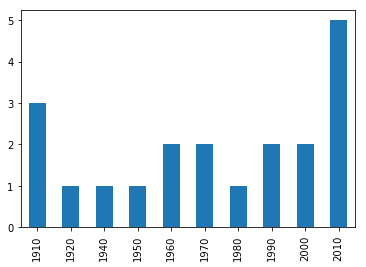

In [36]:
hamletFilms = titles[titles.title == "Hamlet"]
(hamletFilms.year //10 * 10).value_counts().sort_index().plot(kind='bar')

### Plot the number of "Rustler" characters in each decade of the history of film.

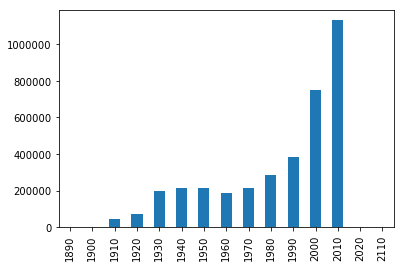

In [39]:
rustlerChar = cast[cast.character == "Rustler"]
(cast.year // 10 *10).value_counts().sort_index().plot(kind = 'bar')

### Plot the number of "Hamlet" characters each decade.

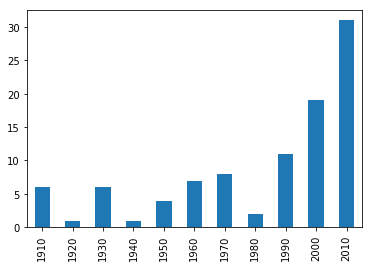

In [41]:
hamletChar = cast[cast.character == "Hamlet"]
(hamletChar.year//10*10).value_counts().sort_index().plot(kind='bar')

### What are the 11 most common character names in movie history?

In [43]:
cast.character.value_counts().head(11)

Himself        20376
Dancer         12160
Extra          11335
Reporter        8271
Doctor          7536
Student         7413
Policeman       6947
Party Guest     6903
Nurse           6773
Bartender       6713
Herself         6452
Name: character, dtype: int64

### Who are the 10 people most often credited as "Herself" in film history?

In [47]:
cast[cast.character == "Herself"].name.value_counts().head(10)

Queen Elizabeth II    11
Laura (II) M?gica      9
Joyce Brothers         9
Margaret Thatcher      9
Estrella Borja         8
Marta Berrocal         8
In?s J. Southern       8
Mary Jo Pehl           8
Marina Revilla         7
Hillary Clinton        7
Name: name, dtype: int64

### Who are the 10 people most often credited as "Himself" in film history?

In [48]:
cast[cast.character == "Himself"].name.value_counts().head(10)

Adolf Hitler          100
Richard Nixon          47
Ronald Reagan          41
John F. Kennedy        37
Ron Jeremy             23
Winston Churchill      23
George W. Bush         23
Benito Mussolini       22
Martin Luther King     22
Bill Clinton           22
Name: name, dtype: int64

### Which actors or actresses appeared in the most movies in the year 1945?

In [49]:
cast[cast.year == 1945].name.value_counts().head(10)

Emmett Vogan        39
Sam (II) Harris     32
Bess Flowers        29
Harold Miller       29
Frank O'Connor      27
Nolan Leary         27
Franklyn Farnum     26
Larry Steers        25
Charles Sullivan    24
Pierre Watkin       24
Name: name, dtype: int64

### Which actors or actresses appeared in the most movies in the year 1985?

In [50]:
cast[cast.year == 1985].name.value_counts().head(10)

Mammootty        22
Shakti Kapoor    21
Sukumari         20
Raj Babbar       15
Mohanlal         15
Lou Scheimer     15
Aruna Irani      15
Deven Verma      13
Om Shivpuri      13
Asrani           13
Name: name, dtype: int64

### Plot how many roles Mammootty has played in each year of his career.

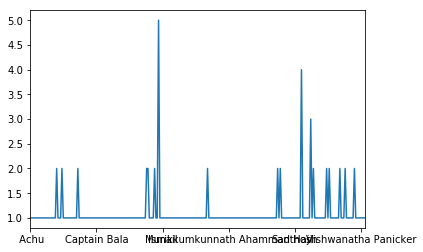

In [52]:
cast[cast.name == "Mammootty"].character.value_counts().sort_index().plot()

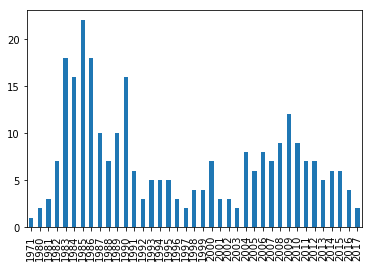

In [56]:
mammoottyChar = cast[cast.name == "Mammootty"]
mammoottyChar.year.value_counts().sort_index().plot(kind='bar')

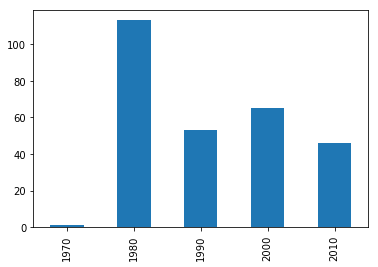

In [57]:
(mammoottyChar.year // 10*10).value_counts().sort_index().plot(kind='bar')

### What are the 10 most frequent roles that start with the phrase "Patron in"?

In [58]:
cast[cast.character.str.startswith("Patron in")].character.value_counts().head(10)

Patron in Frisky Rabbit         16
Patron in the Coffee House       9
Patron in Chinese Restaurant     9
Patron in Billiard Parlor        5
Patron in restaurant             4
Patron in Bar                    4
Patron in cabaret                3
Patron in Club                   3
Patron in Restaurant             3
Patron in booth                  2
Name: character, dtype: int64

### What are the 10 most frequent roles that start with the word "Science"?

In [59]:
cast[cast.character.str.startswith("Science")].character.value_counts().head(10)

Science Teacher         60
Science Student          9
Science Fair Student     9
Science Fair Judge       6
Science Promo Cadet      5
Science Reporter         5
Science Kid              5
Science Club Member      5
Science                  4
Science Fair Kid         3
Name: character, dtype: int64

### Plot the n-values of the roles that Judi Dench has played over her career.

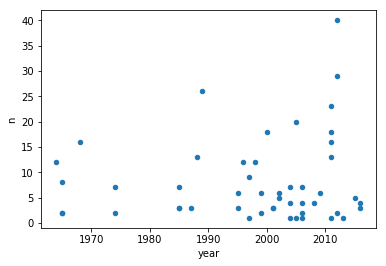

In [77]:
judiRoles = cast[cast.name == "Judi Dench"].sort_values('year')
judiRoles = judiRoles[judiRoles.n.notnull()]
judiRoles.plot(x='year', y='n', kind='scatter')

### Plot the n-values of Cary Grant's roles through his career.

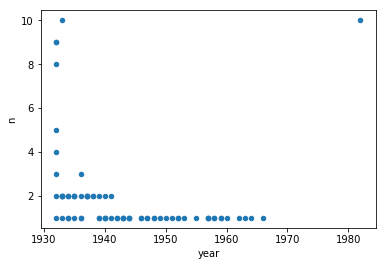

In [79]:
caryRoles = cast[cast.name == "Cary Grant"].sort_values('year')
caryRoles.plot(x='year', y ='n', kind='scatter')

### Plot the n-value of the roles that Sidney Poitier has acted over the years.

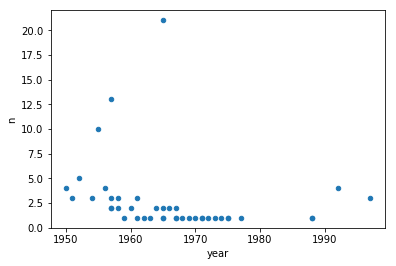

In [80]:
caryRoles = cast[cast.name == "Sidney Poitier"].sort_values('year')
caryRoles.plot(x='year', y ='n', kind='scatter')

### How many leading (n=1) roles were available to actors, and how many to actresses, in the 1950s?

In [84]:
len(cast[(cast.n == 1) & (cast.type == 'actor') & (cast.year //10 == 195)])

6664

In [83]:
len(cast[(cast.n == 1) & (cast.type == 'actress') & (cast.year //10 == 195)])

2991

In [90]:
c = cast[cast.n == 1]
c = c[c.year//10 * 10 == 1950]
c.type.value_counts()

actor      6664
actress    2991
Name: type, dtype: int64

### How many supporting (n=2) roles were available to actors, and how many to actresses, in the 1950s?

In [85]:
len(cast[(cast.n == 2) & (cast.type == 'actor') & (cast.year //10 == 195)])

4599

In [86]:
len(cast[(cast.n == 2) & (cast.type == 'actress') & (cast.year //10 == 195)])

4588

In [89]:
c = cast[cast.n ==2 ]
c = c[c.year //10 *10 ==1950]
c.type.value_counts()

actor      4599
actress    4588
Name: type, dtype: int64